In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [85]:
#path = '/Alphaa/Documents/Book_1.csv'

In [86]:
aqi = pd.read_csv('plotval_data.csv')
aqi = aqi.dropna()

In [87]:
aqi.head(2)

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2024,AQS,401090097,1,1.0,ppm,11,Near Road,19,79.0,42101,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.50307,-97.577981
1,01/02/2024,AQS,401090097,1,1.1,ppm,13,Near Road,24,100.0,42101,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.50307,-97.577981


In [88]:
aqi.shape

(64, 20)

<AxesSubplot:>

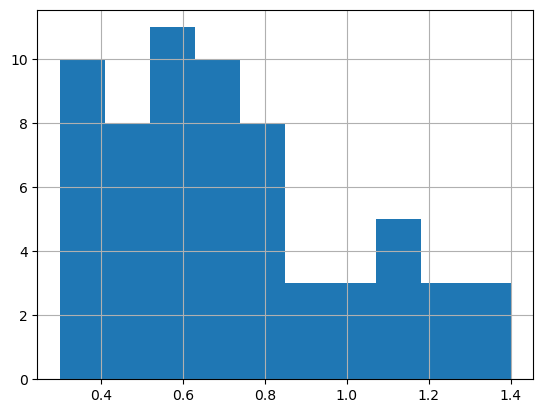

In [89]:
aqi['Daily Max 8-hour CO Concentration'].hist()

## ** Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed

In [90]:
aqi_std = aqi["Daily Max 8-hour CO Concentration"].std()
aqi_std

0.27744225768474123

In [91]:
aqi_mean= aqi["Daily Max 8-hour CO Concentration"].mean()
aqi_mean

0.728125

In [92]:
lower_limit = aqi_mean-1*aqi_std
upper_limit = aqi_mean+2*aqi_std

print(lower_limit, upper_limit)


0.4506827423152588 1.2830095153694825


In [93]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.


aqi['Z_SCORE'] = stats.zscore(aqi['Daily Max 8-hour CO Concentration'], ddof=1)
aqi

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Z_SCORE
0,01/01/2024,AQS,401090097,1,1.0,ppm,11,Near Road,19,79.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.503070,-97.577981,0.979934
1,01/02/2024,AQS,401090097,1,1.1,ppm,13,Near Road,24,100.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.503070,-97.577981,1.340369
2,01/03/2024,AQS,401090097,1,1.0,ppm,11,Near Road,24,100.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.503070,-97.577981,0.979934
3,01/04/2024,AQS,401090097,1,1.4,ppm,16,Near Road,24,100.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.503070,-97.577981,2.421675
4,01/05/2024,AQS,401090097,1,0.8,ppm,9,Near Road,24,100.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.503070,-97.577981,0.259063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,01/28/2024,AQS,401091037,1,0.8,ppm,9,OKC NORTH,24,100.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.614131,-97.475083,0.259063
60,01/29/2024,AQS,401091037,1,0.7,ppm,8,OKC NORTH,24,100.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.614131,-97.475083,-0.101372
61,01/30/2024,AQS,401091037,1,0.8,ppm,9,OKC NORTH,24,100.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.614131,-97.475083,0.259063
62,01/31/2024,AQS,401091037,1,1.2,ppm,14,OKC NORTH,24,100.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.614131,-97.475083,1.700804


In [94]:
aqi[(aqi['Z_SCORE'] > 3) | (aqi['Z_SCORE'] < -3)]

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Z_SCORE


# Exemplar: Explore hypothesis testing

In [95]:
aqi.describe()

,Site ID,POC,Daily Max 8-hour CO Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE,Z_SCORE
count,6.400000e+01,64.0,64.000000,64.00000,64.000000,64.000000,64.0,64.0,64.0,64.0,64.000000,64.000000,6.400000e+01
mean,4.010906e+08,1.0,0.728125,8.40625,23.031250,95.953125,42101.0,36420.0,40.0,109.0,35.558600,-97.526532,-4.597017e-17
std,4.737155e+02,0.0,0.277442,3.15584,4.027559,16.832913,0.0,0.0,0.0,0.0,0.055970,0.051856,1.000000e+00
min,4.010901e+08,1.0,0.300000,3.00000,2.000000,8.000000,42101.0,36420.0,40.0,109.0,35.503070,-97.577981,-1.543114e+00
25%,4.010901e+08,1.0,0.500000,6.00000,24.000000,100.000000,42101.0,36420.0,40.0,109.0,35.503070,-97.577981,-8.222432e-01
50%,4.010906e+08,1.0,0.700000,8.00000,24.000000,100.000000,42101.0,36420.0,40.0,109.0,35.558600,-97.526532,-1.013724e-01
75%,4.010910e+08,1.0,0.900000,10.00000,24.000000,100.000000,42101.0,36420.0,40.0,109.0,35.614131,-97.475083,6.194983e-01
max,4.010910e+08,1.0,1.400000,16.00000,24.000000,100.000000,42101.0,36420.0,40.0,109.0,35.614131,-97.475083,2.421675e+00


In [96]:
aqi['Date'].value_counts()

01/01/2024    2
01/02/2024    2
01/31/2024    2
01/30/2024    2
01/29/2024    2
01/28/2024    2
01/27/2024    2
01/26/2024    2
01/25/2024    2
01/24/2024    2
01/23/2024    2
01/22/2024    2
01/21/2024    2
01/20/2024    2
01/19/2024    2
01/18/2024    2
01/17/2024    2
01/16/2024    2
01/15/2024    2
01/14/2024    2
01/13/2024    2
01/12/2024    2
01/11/2024    2
01/10/2024    2
01/09/2024    2
01/08/2024    2
01/07/2024    2
01/06/2024    2
01/05/2024    2
01/04/2024    2
01/03/2024    2
02/01/2024    2
Name: Date, dtype: int64

Before you proceed, recall the following steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.<br>
2. Set the significance level.<br>
3. Determine the appropriate test procedure.<br>
4. Compute the p-value.<br>
5. Draw your conclusion.

### Hypothesis 1: we are considering a Date-focused approach. Within California, we want to know if the mean AQI on different dates is statistically different from the rest of other days.

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [105]:
ca_la = aqi[aqi['Date']== '01/01/2024']
ca_other = aqi[(aqi['STATE_CODE']== 40) & (aqi['Date']!='01/01/2024')]

Formulate your null and alternative hypotheses:

*   $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California.
*   $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California.


In [102]:
# For this analysis, the significance level is 5%

significance_level = 0.05
significance_level

0.05

#### Determine the appropriate test procedure:

Here, you are comparing the sample means between two independent samples. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the p-value

In [106]:
ca_la

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Z_SCORE
0,01/01/2024,AQS,401090097,1,1.0,ppm,11,Near Road,19,79.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.503070,-97.577981,0.979934
32,01/01/2024,AQS,401091037,1,0.7,ppm,8,OKC NORTH,19,79.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.614131,-97.475083,-0.101372


In [107]:
# Compute your p-value here

stats.ttest_ind(a=ca_la['DAILY_AQI_VALUE'], b=ca_other['DAILY_AQI_VALUE'], equal_var=False)

Ttest_indResult(statistic=0.7266620692693091, pvalue=0.5865431145947817)

### Hypothesis 2: With limited resources, WE HAVE to choose 01/02/2024 and 01/17/2024 for the NEXT OBSERVATION. Does 01/02/2024 have a lower AQI than 01/17/2024?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [118]:
# Create dataframes for each sample being compared in your test

first = aqi[aqi['Date']=='01/02/2024']
second = aqi[aqi['Date']=='01/30/2024']

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses:**

*   $H_0$: The mean AQI of 01/02/2024 is greater than or equal to that of 01/17/2024.
*   $H_A$: The mean AQI of 01/02/2024 is **below** that of 01/17/2024.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, you are comparing the sample means between two independent samples in one direction. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the p-value

In [119]:
# Compute your p-value here

tstat, pvalue = stats.ttest_ind(a=first['DAILY_AQI_VALUE'], b=second['DAILY_AQI_VALUE'], alternative='less', equal_var=False)
print(tstat)
print(pvalue)

0.0
0.5


In [120]:
first

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Z_SCORE
1,01/02/2024,AQS,401090097,1,1.1,ppm,13,Near Road,24,100.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.503070,-97.577981,1.340369
33,01/02/2024,AQS,401091037,1,0.8,ppm,9,OKC NORTH,16,67.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.614131,-97.475083,0.259063


In [121]:
second

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Z_SCORE
29,01/30/2024,AQS,401090097,1,1.1,ppm,13,Near Road,24,100.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.503070,-97.577981,1.340369
61,01/30/2024,AQS,401091037,1,0.8,ppm,9,OKC NORTH,24,100.0,...,Carbon monoxide,36420,"Oklahoma City, OK",40,Oklahoma,109,Oklahoma,35.614131,-97.475083,0.259063


# Conclusion

**What are key takeaways from this lab?**

Even with small sample sizes, the variation within the data is enough to allow you to make statistically significant conclusions. we identified at the 5% significance level that the 01/02/2024 mean AQI was stastitically different from the rest of Dates, and that 01/02/2024 does have a lower mean AQI than 01/30/24
